In [2]:
import numpy as np                 
import scipy.stats                
import csv                         
import pandas as pd                
import matplotlib.pyplot as plt    
import math
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [5]:
train_data = pd.read_csv('train_and_test2.csv')
test_data = pd.read_csv('tested.csv')

train_data.head(10)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0.0,0,0,1


In [6]:
train_data.describe(include="all") 

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


2urvived    0    1  Survival Rate
Pclass                           
1         187  136       0.421053
2         190   87       0.314079
3         590  119       0.167842


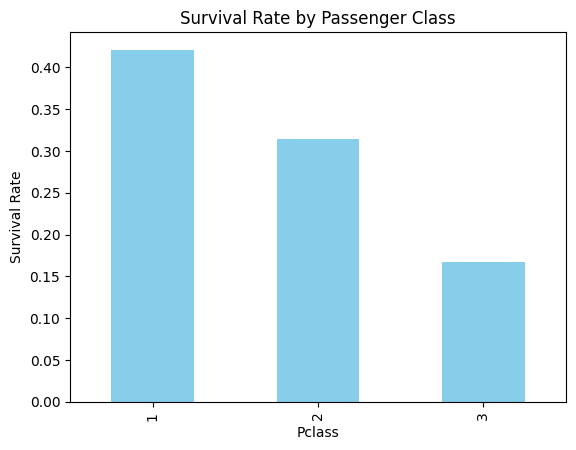

Chi-Square Statistic: 78.79277061340258, p-value: 7.769038155387118e-18


In [8]:
#Visualization: 
pivot_class_survived = train_data.pivot_table(index='Pclass', columns='2urvived', aggfunc='size', fill_value=0)

#Survival rate by class
pivot_class_survived['Survival Rate'] = pivot_class_survived[1] / (pivot_class_survived[0] + pivot_class_survived[1])
print(pivot_class_survived)

# Plotting the survival rate by class
pivot_class_survived['Survival Rate'].plot(kind='bar', color='skyblue')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

chi2, p, dof, ex = chi2_contingency(pivot_class_survived[[0, 1]])
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

In [10]:
train_data[['2urvived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean()

2urvived
Pclass Sex          
1      0    0.251397
       1    0.631944
2      0    0.099415
       1    0.660377
3      0    0.095335
       1    0.333333

In [12]:
contingency_table = pd.crosstab(train_data['Sex'], train_data['2urvived'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")

Chi-Square Statistic: 211.7545976911042
p-value: 5.68944265543665e-48


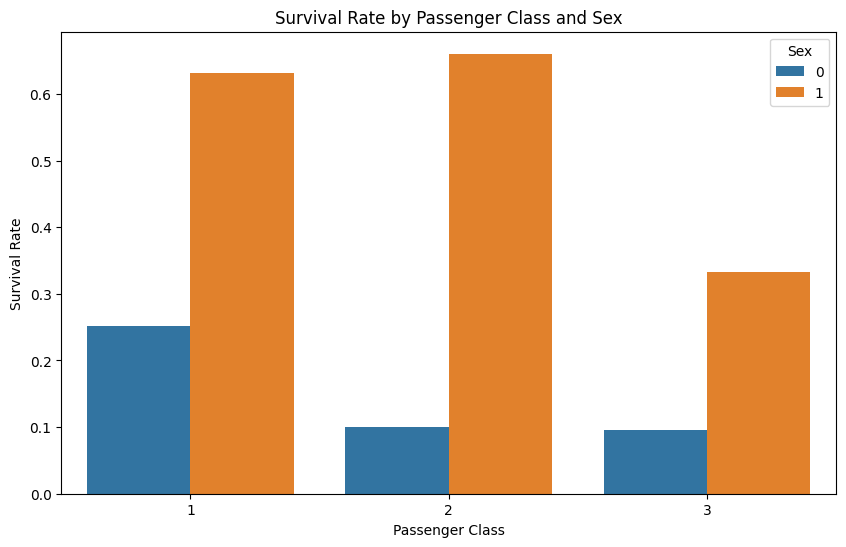

In [13]:
grouped_data = train_data[['2urvived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean().reset_index()

# Bar graph to visualize the relation
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='2urvived', hue='Sex', data=grouped_data)

plt.title('Survival Rate by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')

# Show the plot
plt.show()

<Figure size 1000x1000 with 0 Axes>

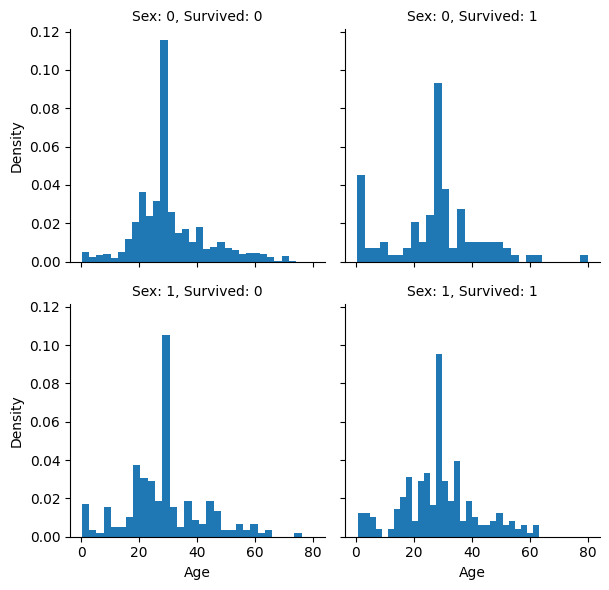

In [14]:
# Assuming 'train_data' is your DataFrame and it includes 'Survived', 'Sex', and 'Age'
plt.figure(figsize=(10, 10))

# Create a FacetGrid with normalized histograms
g = sns.FacetGrid(train_data, row='Sex', col='2urvived')
g.map(plt.hist, 'Age', bins=30, density=True)

# Adding labels and titles for clarity
g.set_xlabels('Age')
g.set_ylabels('Density')
g.set_titles('Sex: {row_name}, Survived: {col_name}')

# Display the plot
plt.show()

In [15]:
age_bins = [0, 18, 30, 40, 50, 60, 120]  # Adjust the bins as you see fit
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']

# Create a new column for the age groups
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Create the contingency table
contingency_table = pd.crosstab(train_data['AgeGroup'], train_data['2urvived'])

# Apply the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 26.695340240297988
p-value: 6.538683661761107e-05


In [19]:
num_females = train_data['Sex'].value_counts()[0]
num_males = train_data['Sex'].value_counts()[1]

print(f"Number of females: {num_females}")
print(f"Number of males: {num_males}")

Number of females: 843
Number of males: 466
